## 은닉층 3개

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [3]:
# sigmoid 함수
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [9]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes1, hidden_nodes2, hidden_nodes3, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes1 = hidden_nodes1
        self.hidden_nodes2 = hidden_nodes2
        self.hidden_nodes3 = hidden_nodes3
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2  Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes1) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes1)      
        
        # 은닉층 가중치  W3  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes1, self.hidden_nodes2) / np.sqrt(self.hidden_nodes1/2)
        self.b3 = np.random.rand(self.hidden_nodes2)
        
        # 은닉층 가중치  W4  Xavier/He 방법으로 self.W4 가중치 초기화
        self.W4 = np.random.randn(self.hidden_nodes2, self.hidden_nodes3) / np.sqrt(self.hidden_nodes2/2)
        self.b4 = np.random.rand(self.hidden_nodes3)
        
        # 출력층 가중치는 W5  Xavier/He 방법으로 self.W5 가중치 초기화
        self.W5 = np.random.randn(self.hidden_nodes3, self.output_nodes) / np.sqrt(self.hidden_nodes3/2)
        self.b5 = np.random.rand(self.output_nodes)
        
        # 출력층 선형회귀 값 Z5, 출력값 A5 정의 (모두 행렬로 표시)
        self.Z5 = np.zeros([1,output_nodes])
        self.A5 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z4, 출력값 A4 정의 (모두 행렬로 표시)
        self.Z4 = np.zeros([1,hidden_nodes3])
        self.A4 = np.zeros([1,hidden_nodes3])
        
        # 은닉층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,hidden_nodes2])
        self.A3 = np.zeros([1,hidden_nodes2])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes1])
        self.A2 = np.zeros([1,hidden_nodes1])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])  
                        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    # 손실함수
    def feed_forward(self):
        delta = 1e-7    # log 무한대 발산 방지
    
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 은닉층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        # 은닉층 선형회귀 값 Z4, 출력값 A4 계산
        self.Z4 = np.dot(self.A3, self.W4) + self.b4
        self.A4 = sigmoid(self.Z4)
        
        # 출력층 선형회귀 값 Z5, 출력값 A5 계산
        self.Z5 = np.dot(self.A4, self.W5) + self.b5
        self.A5 = sigmoid(self.Z5)
        
        return  -np.sum( self.target_data*np.log(self.A5 + delta) + (1-self.target_data)*np.log((1 - self.A5)+delta ) )    
    
    # 손실 값 계산
    def loss_val(self):
        delta = 1e-7    # log 무한대 발산 방지
    
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 은닉층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        # 은닉층 선형회귀 값 Z4, 출력값 A4 계산
        self.Z4 = np.dot(self.A3, self.W4) + self.b4
        self.A4 = sigmoid(self.Z4)
        
        # 출력층 선형회귀 값 Z5, 출력값 A5 계산
        self.Z5 = np.dot(self.A4, self.W5) + self.b5
        self.A5 = sigmoid(self.Z5)
        
        return  -np.sum( self.target_data*np.log(self.A5 + delta) + (1-self.target_data)*np.log((1 - self.A5)+delta ) )    
   
    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        Z4 = np.dot(A3, self.W4) + self.b4
        A4 = sigmoid(Z4)
        
        Z5 = np.dot(A3, self.W5) + self.b5
        A5 = sigmoid(Z5)
        
        predicted_num = np.argmax(A5)
    
        return predicted_num
    
    # 정확도 측정함수
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        # temp list which contains label and prediction in sequence
        temp_list = []
        
        for index in range(len(input_data)):
                        
            label = int(target_data[index])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (input_data[index, :] / 255.0 * 0.99) + 0.01
            
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌            
            predicted_num = self.predict(np.array(data, ndmin=2))
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(label)
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        print("Current Accuracy = ", len(matched_list)/(len(input_data)) )
        
        return matched_list, not_matched_list, index_label_prediction_list
    
        
    # 수치미분을 이용하여 손실함수가 최소가 될때 까지 학습하는 함수
    def train(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_5 구함
        loss_5 = (self.A5-self.target_data) * self.A5 * (1-self.A5)
        
        # 출력층 가중치 W5, 출력층 바이어스 b5 업데이트
        self.W5 = self.W5 - self.learning_rate * np.dot(self.A4.T, loss_5)          
        self.b5 = self.b5 - self.learning_rate * loss_5  
        
        # 은닉층 loss 인 loss_4 구함
        loss_4 = np.dot(loss_5, self.W5.T) * self.A4 * (1-self.A4)
        
        # 은닉층 가중치 W4, 은닉층 바이어스 b4 업데이트
        self.W4 = self.W4 - self.learning_rate * np.dot(self.A3.T, loss_4)          
        self.b4 = self.b4 - self.learning_rate * loss_4  
        
        # 은닉층 loss 인 loss_3 구함
        loss_3 = np.dot(loss_4, self.W4.T) * self.A3 * (1-self.A3)
        
        # 은닉층 가중치 W3, 은닉층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)          
        self.b3 = self.b3 - self.learning_rate * loss_3  
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)         
        self.b2 = self.b2 - self.learning_rate * loss_2

In [5]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 training data 읽어옴
training_data = np.loadtxt('./(191116)mnist_train.csv', delimiter=',', dtype=np.float32)

print("training_data.shape = ", training_data.shape)
print("training_data[0,0] = ", training_data[0,0], ", len(training_data[0]) = ", len(training_data[0]))

training_data.shape =  (60000, 785)
training_data[0,0] =  5.0 , len(training_data[0]) =  785


### 오차역전파를 이용한 NeuralNetwork class 구현 및 검증

In [10]:
# hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 100     # hidden 1 nodes
h2_nodes = 100
h3_nodes = 100
o_nodes = 10       # output nodes
lr = 0.1           # learning rate
epochs = 1         # epochs

# 손실함수 값을 저장할 list 생성
loss_val_list = []

nn = NeuralNetwork(i_nodes, h1_nodes, h2_nodes, h3_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    for step in range(len(training_data)):  # train
    
        # input_data, target_data normalize        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[step, 0])] = 0.99
    
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
        nn.train( np.array(input_data, ndmin=2), np.array(target_data, ndmin=2) )
    
        if step % 1000 == 0:
            print("epochs = ", i, ", step = ", step,  ", current loss_val = ", nn.loss_val())
        
        # 손실함수 값 저장
        loss_val_list.append(nn.loss_val())        
        
end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time) 

epochs =  0 , step =  0 , current loss_val =  6.417880277231124
epochs =  0 , step =  1000 , current loss_val =  2.9522439562356992
epochs =  0 , step =  2000 , current loss_val =  2.0009945261400697
epochs =  0 , step =  3000 , current loss_val =  3.112621425625837
epochs =  0 , step =  4000 , current loss_val =  3.5442884630149782
epochs =  0 , step =  5000 , current loss_val =  2.475763161489849
epochs =  0 , step =  6000 , current loss_val =  1.7589021226200539
epochs =  0 , step =  7000 , current loss_val =  3.3185714056251228
epochs =  0 , step =  8000 , current loss_val =  1.4409927511172476
epochs =  0 , step =  9000 , current loss_val =  2.46202594153121
epochs =  0 , step =  10000 , current loss_val =  2.004852537427308
epochs =  0 , step =  11000 , current loss_val =  1.5614485662850612
epochs =  0 , step =  12000 , current loss_val =  1.2509285945432804
epochs =  0 , step =  13000 , current loss_val =  1.0036990250214086
epochs =  0 , step =  14000 , current loss_val =  0.8

In [11]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 test data 읽어옴
test_data = np.loadtxt('./(191116)mnist_test.csv', delimiter=',', dtype=np.float32)

test_input_data = test_data[ : , 1: ]
test_target_data = test_data[ : , 0 ]

print("test_data.shape = ", test_data.shape)
print("test_data[0,0] = ", test_data[0,0], ", len(test_data[0]) = ", len(test_data[0]))   

test_data.shape =  (10000, 785)
test_data[0,0] =  7.0 , len(test_data[0]) =  785


In [17]:
# measure accuracy
(true_list, false_list, index_label_prediction_list) = nn.accuracy(test_input_data, test_target_data)

Current Accuracy =  0.0346


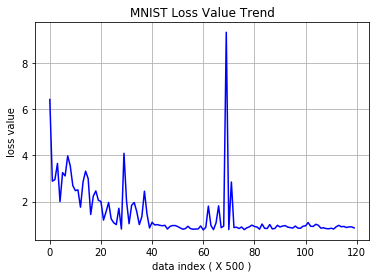

In [16]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 500):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500 )')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()